<h1> Imports

In [31]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
import string

from sklearn.feature_extraction.text import TfidfVectorizer

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

<h1> Load Data

In [32]:
data = pd.read_csv('datasets/news-article-categories_v2.csv')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [33]:
data["content"] = data["title"] + ". " + data["body"]

In [34]:
data_slice = data[data.category=="ARTS & CULTURE"]

In [35]:
data_slice = data_slice[:15]

<h1> Preprocessing function

In [36]:
#Dictionnaire de tous les signes de ponctuation
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

#Remplacement de tous ls signes de ponctuation par None, puis on met en minuscule
def preprocess(text):
  return nltk.word_tokenize(text.lower().translate(remove_punctuation_map))

In [37]:
eng_stopwords = stopwords.words('english')

<h1> TF-IDF Vectorization

In [38]:
vectorizer = TfidfVectorizer(tokenizer=preprocess, stop_words=eng_stopwords)

<h1> Compute similarity

In [39]:
def compute_similarity(a, b):
  tfidf = vectorizer.fit_transform([a, b])

  return ((tfidf * tfidf.T).toarray())[0,1]

<h1> Test

In [40]:
#2 paragraphs from the cosine similarity wikipedia article
wiki1 = "In data analysis, cosine similarity is a measure of similarity between two non-zero vectors defined in an inner product space. Cosine similarity is the cosine of the angle between the vectors; that is, it is the dot product of the vectors divided by the product of their lengths. It follows that the cosine similarity does not depend on the magnitudes of the vectors, but only on their angle. The cosine similarity always belongs to the interval. For example, two proportional vectors have a cosine similarity of 1, two orthogonal vectors have a similarity of 0, and two opposite vectors have a similarity of -1. In some contexts, the component values of the vectors cannot be negative, in which case the cosine similarity is bounded in. For example, in information retrieval and text mining, each word is assigned a different coordinate and a document is represented by the vector of the numbers of occurrences of each word in the document. Cosine similarity then gives a useful measure of how similar two documents are likely to be, in terms of their subject matter, and independently of the length of the documents."
wiki2 = "It is important to note that the cosine distance is not a true distance metric as it does not exhibit the triangle inequality property—or, more formally, the Schwarz inequality—and it violates the coincidence axiom. One way to see this is to note that the cosine distance is half of the squared Euclidean distance of the L_{2} normalization of the vectors, and squared Euclidean distance does not satisfy the triangle inequality either. To repair the triangle inequality property while maintaining the same ordering, it is necessary to convert to angular distance or Euclidean distance. Alternatively, the triangular inequality that does work for angular distances can be expressed directly in terms of the cosines; see below."

In [41]:
compute_similarity(wiki1, wiki2)

c:\Users\julie\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn(


0.06661677693604373

<h1> Heatmap

In [42]:
M = np.zeros((data_slice.shape[0], data_slice.shape[0])) # we create a 30x30 matrix to contain the results of article_i with article_j


for i, row in tqdm(data_slice.iterrows(), total=data_slice.shape[0], desc='1st level'): # we define i
	for j, next_row in data_slice.iterrows(): # we define j
		M[i, j] = compute_similarity(row.content, next_row.content) # we populate the matrix with the results


1st level: 100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


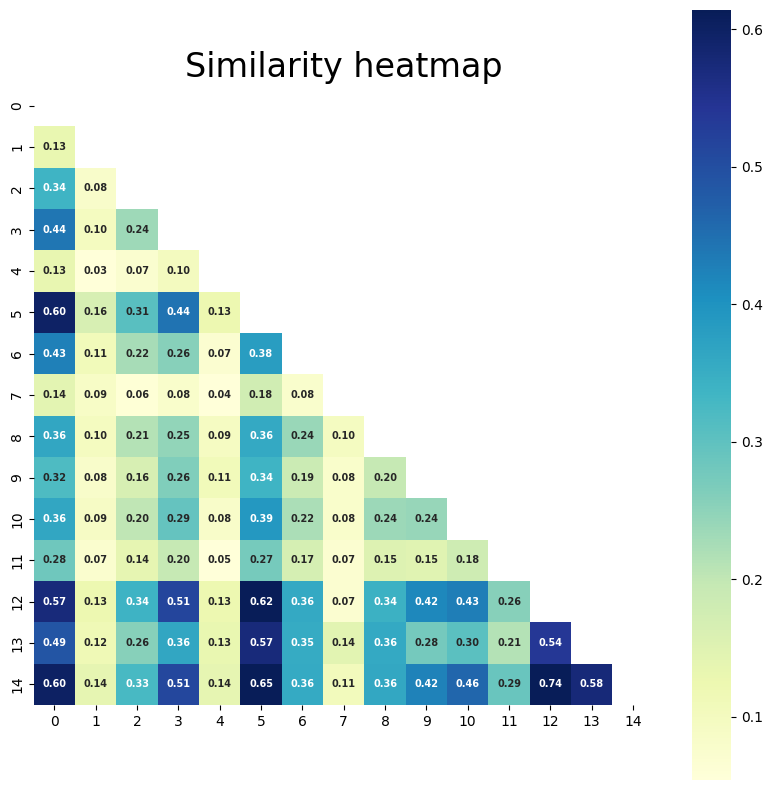

In [45]:
labels = data_slice.index
similarity_df = pd.DataFrame(M, columns=labels, index=labels) # let's create the dataframe
mask = np.triu(np.ones_like(similarity_df)) # we apply a mask to remove the top of the heatmap

# let's create the viz
plt.figure(figsize=(10, 10))
sns.heatmap(
			similarity_df,
			square=True, 
			annot=True, 
			robust=True,
			fmt='.2f',
			annot_kws={'size': 7, 'fontweight': 'bold'},
			yticklabels=similarity_df.columns,
			xticklabels=similarity_df.columns,
			cmap="YlGnBu",
			mask=mask
)

plt.title('Similarity heatmap', fontdict={'fontsize': 24})
plt.show()

In [51]:
print(data_slice.body.iloc[0])
print(data_slice.body.iloc[14])

In October 2017, Carolyn Kramer received a disturbing phone call. The former modeling agent listened intently as a model she used to represent told her that a famous French photographer, who still shoots for top publications, raped her when she was 16. Shortly after meeting the man at a restaurant in 1983, the model said she blacked out after drinking one glass of champagne, then woke up in his bed the next morning with a sore and bruised vagina. The woman, who preferred to remain anonymous, confirmed this story with HuffPost, but did not want to name the photographer for fear of legal repercussions. “He was one of the photographers that agents and clients and young girls basically knew was lecherous,” Kramer said, claiming that she and other agents sent their models to him in the ’80s anyway. “[But] what I didn’t realize [at the time] is that he was raping girls.”  Kramer said she broke down crying after the woman relayed her story of assault. “In that moment I felt that I let down th